## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**: 闫越越 112024321341996


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：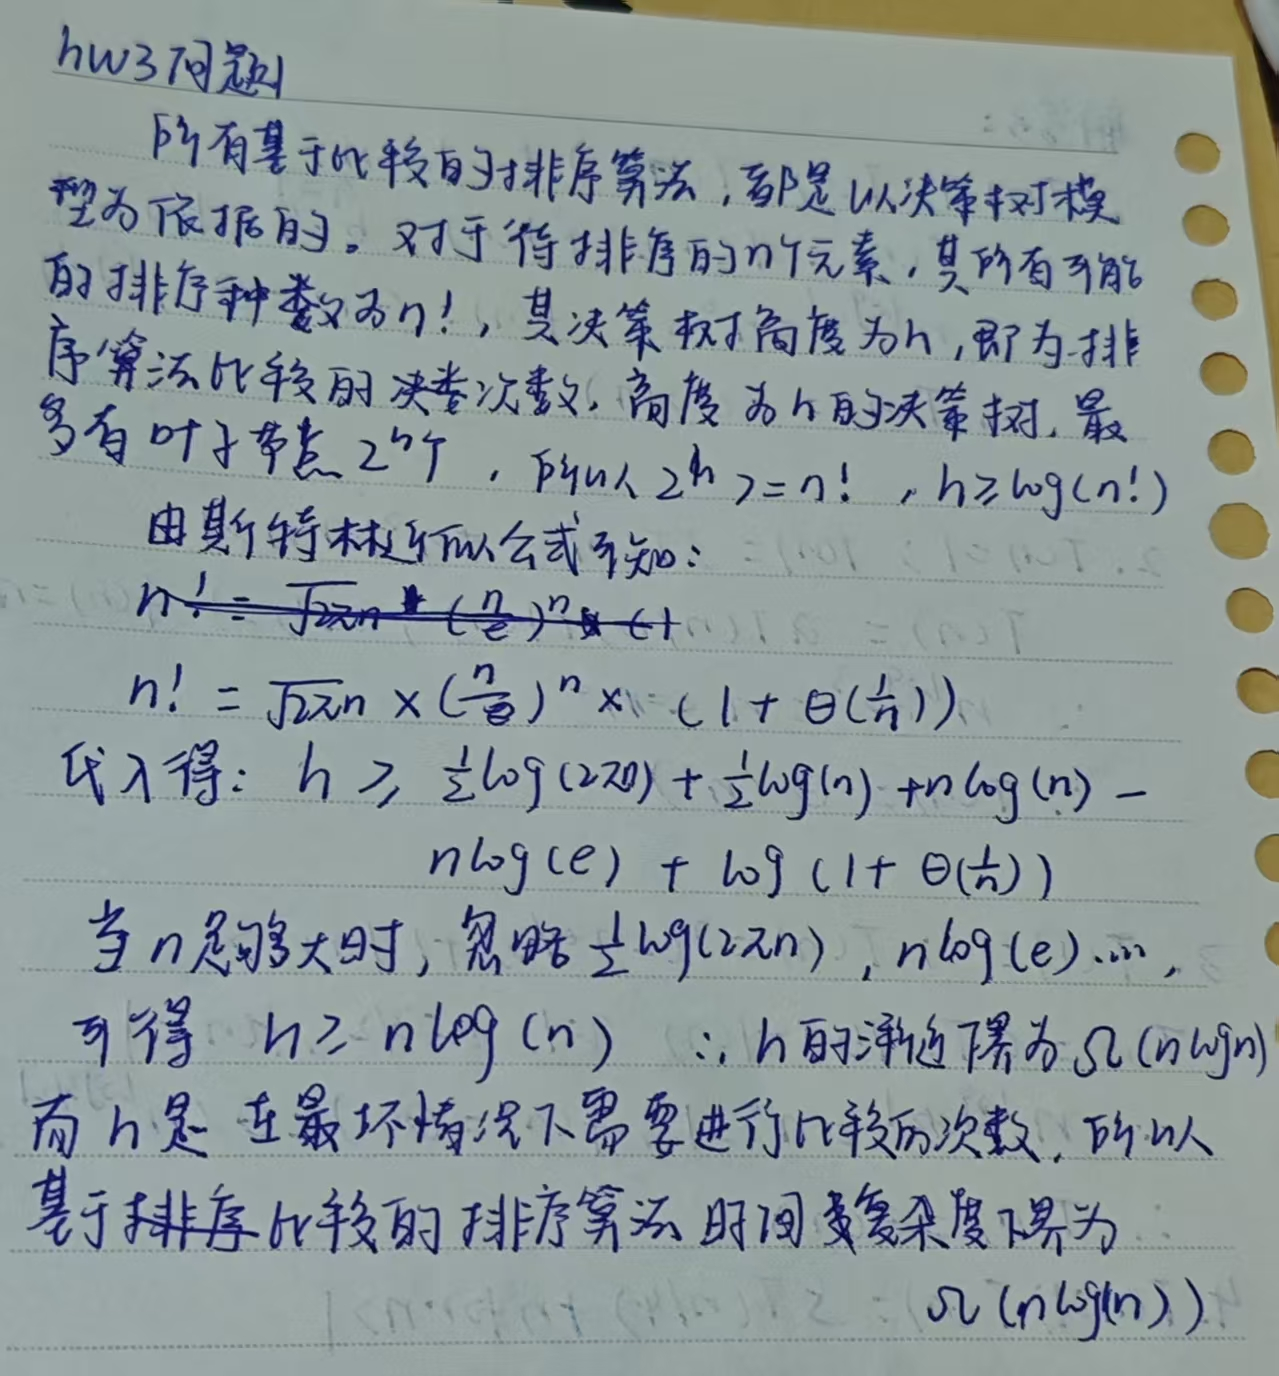

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

##### 1. idea

   首先初始化空树，遍历数组中的每个元素：若树为空，将该元素设为根节点；若树非空，从根节点开始比较：若新值 < 当前节点值，进入左子树；若新值 > 当前节点值，进入右子树，重复比较直到找到空位置插入。最后draw_bst 函数利用graphviz库来绘制二叉搜索树。它通过递归遍历二叉树的每个节点，为每个节点创建一个图形节点，并根据节点间的父子关系添加边，最终生成可视化的二叉搜索树图形 。

##### result:
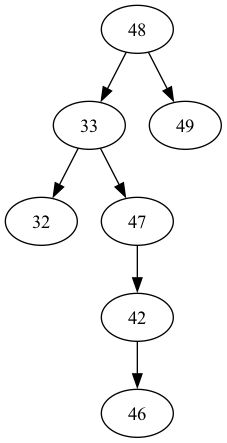

##### code:

In [ ]:
#代码段参考deepseek模型

import graphviz

# 定义二叉树节点类
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# 插入节点到二叉搜索树
def insert(root, val):
    if root is None:
        return TreeNode(val)
    if val < root.val:
        root.left = insert(root.left, val)
    else:
        root.right = insert(root.right, val)
    return root

# 构建二叉搜索树
def build_bst(nums):
    root = None
    for num in nums:
        root = insert(root, num)
    return root

# 使用graphviz绘制二叉搜索树
def draw_bst(root):
    dot = graphviz.Digraph(comment='Binary Search Tree')
    def add_nodes_edges(node):
        if node:
            dot.node(str(id(node)), str(node.val))
            if node.left:
                dot.edge(str(id(node)), str(id(node.left)))
                add_nodes_edges(node.left)
            if node.right:
                dot.edge(str(id(node)), str(id(node.right)))
                add_nodes_edges(node.right)
    add_nodes_edges(root)
    return dot

nums = [48, 33, 49, 47, 42, 46, 32]
root = build_bst(nums)
dot = draw_bst(root)
dot.render('bst_before_delete', view=True)

##### 2.idea

（1）若节点是叶子节点，该节点的左子节点和右子节点都为空，直接返回 None ，相当于删除该节点 。
（2）若节点只有一个子节点，若左子节点为空，返回右子节点；若右子节点为空，返回左子节点，这样就用子节点替换了要删除的节点 。
（3）若节点有两个子节点，调用min_value_node函数找到该节点右子树中的最小节点。用后继节点的值替换要删除节点的值，然后再递归地从右子树中删除这个后继节点。

##### result

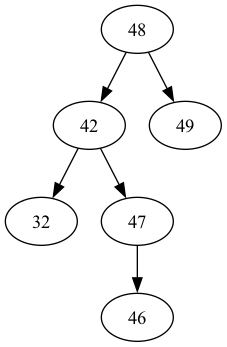

##### code:

In [ ]:
#代码段参考deepseek模型

# 删除节点
def delete_node(root, val):
    if root is None:
        return root
    if val < root.val:
        root.left = delete_node(root.left, val)
    elif val > root.val:
        root.right = delete_node(root.right, val)
    else:
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left
        temp = min_value_node(root.right)
        root.val = temp.val
        root.right = delete_node(root.right, temp.val)
    return root

# 找到二叉搜索树中值最小的节点
def min_value_node(node):
    current = node
    while current.left:
        current = current.left
    return current

nums = [48, 33, 49, 47, 42, 46, 32]
root = build_bst(nums)
root = delete_node(root, 33)
dot = draw_bst(root)
dot.render('bst_after_delete', view=True)

## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

##### idea：
(1)将课程时间转换为分钟数，方便后续比较和计算。把课程的开始时间和结束时间分别提取出来，按时间先后顺序排序。
(2)算法使用最小堆,维护一个最小堆，堆中元素为课程的结束时间。遍历排序后的时间列表，若当前时间是某课程的开始时间，检查堆顶元素（即最早结束的课程的结束时间），若堆顶元素小于等于当前开始时间，说明之前课程已结束，可复用该教室，将堆顶元素弹出；若堆顶元素大于当前开始时间，则需新增一间教室。然后将当前课程的结束时间加入堆中。
(3)最后统计结果，结果遍历结束后，堆的大小就是所需教室的最少数量。通过记录每个时间点教室的使用情况，可整理出每个教室安排的课程。

##### code:

In [12]:
from collections import defaultdict

# 课程时间列表
courses = [(900, 1230), (1100, 1400), (1300, 1430), (900, 1030), (1300, 1430), (1400, 1630), (1500, 1630), (1500, 1630), (900, 1030)]

# 按照课程结束时间进行排序
sorted_courses = sorted(courses, key=lambda x: x[1])

# 记录每个教室的结束时间
classrooms = []

# 记录每个教室安排的课程
classroom_schedule = defaultdict(list)

for course in sorted_courses:
    assigned = False
    for i, end_time in enumerate(classrooms):
        if course[0] >= end_time:
            classrooms[i] = course[1]
            classroom_schedule[i + 1].append(course)
            assigned = True
            break
    if not assigned:
        classrooms.append(course[1])
        classroom_schedule[len(classrooms)].append(course)

# 输出最少需要的教室数量
print(f"最少需要 {len(classrooms)} 间教室")
# 输出每个教室安排的课程
for room, schedule in classroom_schedule.items():
    print(f"教室 {room}: {schedule}")


最少需要 3 间教室
教室 1: [(900, 1030), (1100, 1400), (1400, 1630)]
教室 2: [(900, 1030), (1300, 1430), (1500, 1630)]
教室 3: [(900, 1230), (1300, 1430), (1500, 1630)]


## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

##### idea：使用动态规划，其递推关系为斐波那契数列

设dp[i]表示爬上i阶楼梯的方法数。对于第n阶楼梯，到达它的前一步有两种情况：

(1)从第n - 1阶楼梯爬一阶到达第n阶，此时方法数等于爬上n - 1阶楼梯的方法数，即dp[n - 1] 。

(2)从第n - 2阶楼梯爬两阶到达第n阶，此时方法数等于爬上n - 2阶楼梯的方法数，即dp[n - 2] 。
所以得到状态转移方程：dp[i] = dp[i - 1] + dp[i - 2] ，其中 i > 2 。

边界条件：
当n = 1时，只有一种方法，即直接爬一阶，所以 dp[1] = 1 。
当n = 2时，有两种方法，一次爬两阶或者分两次每次爬一阶，所以 dp[2] = 2 。

##### 时间复杂度：

该算法计算从第3阶到第n阶楼梯的方法数，总共进行了n-2次计算，每次计算只涉及简单的加法操作，时间复杂度为O(n)。

##### code:

In [15]:
def climb_stairs(n):
    if n == 1:
        return 1
    elif n == 2:
        return 2
    dp = [0] * (n + 1)
    dp[1] = 1
    dp[2] = 2
    for i in range(3, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]
    return dp[n]

# 测试示例
n = 5
print(f"爬上 {n} 阶楼梯的方法数为: {climb_stairs(n)}")

爬上 5 阶楼梯的方法数为: 8


## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

##### idea：使用动态规划

设dp2[i][j]表示在前i个物品（这里是大理石）中，当背包容量（小推车承重）为j时能获得的最大价值。

状态转移方程：

对于第i个物品（i从1开始计数），有两种选择：
（1）不放入第i个物品，此时最大价值就是前i - 1个物品在背包容量为j时的最大价值，即dp2[i - 1][j] 。

（2）放入第i个物品，前提是背包容量j大于等于第i个物品的重量 weights[i - 1] 。此时最大价值是前i - 1个物品在背包容量为j - weights[i - 1]时的最大价值加上第i个物品的价值values[i - 1] ，即dp2[i - 1][j - weights[i - 1]] + values[i - 1] 。

边界条件：

当i = 0（没有物品）或者j = 0（背包容量为0）时，dp2[0][j] = 0 ，dp2[i][0] = 0 。

##### 时间复杂度：
该算法有一个两层嵌套的循环，外层循环遍历物品数量，内层循环遍历背包容量。所以总的时间复杂度是O(nW) ，在本题中为O(4×9)=O(36) ，一般情况下对于n个物品和背包容量W，时间复杂度为O(nW)。

##### code:


In [17]:
weights = [5, 4, 6, 3]
values = [10, 40, 30, 50]
W = 9
n = len(weights)
dp2 = [[0 for _ in range(W + 1)] for _ in range(n + 1)]
for i in range(1, n + 1):
    for j in range(1, W + 1):
        if j < weights[i - 1]:
            dp2[i][j] = dp2[i - 1][j]
        else:
            dp2[i][j] = max(dp2[i - 1][j], dp2[i - 1][j - weights[i - 1]] + values[i - 1])
print(dp2[n][W])            #output:输出最终结果：90

90


## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

##### idea：

使用两个指针，一个从左向右移动（left指针），一个从右向左移动（right指针）。同时记录左边的最高高度（left_max ）和右边的最高高度（right_max ）。比较 left_max 和 right_max ，如果left_max较小，那么 left 指针指向的柱子能接住的雨水量取决于 left_max ，将其加入总雨水量，然后 left 指针右移一位，并更新left_max；如果right_max较小，那么 right 指针指向的柱子能接住的雨水量取决于 right_max ，将其加入总雨水量，然后 right 指针左移一位，并更新right_max。重复这个过程，直到left指针和right指针相遇。

##### 时间复杂度：
由于只需要遍历一次数组，所以时间复杂度为O(n)。

##### code：
 

In [18]:
# 代码段参考deepseek模型
def trap(height):
    if not height:
        return 0
    
    left, right = 0, len(height) - 1
    left_max = right_max = 0
    res = 0
    
    while left < right:
        if height[left] < height[right]:
            if height[left] >= left_max:
                left_max = height[left]
            else:
                res += left_max - height[left]
            left += 1
        else:
            if height[right] >= right_max:
                right_max = height[right]
            else:
                res += right_max - height[right]
            right -= 1
    
    return res

# 测试用例
print(trap([0,1,0,2,1,0,1,3,2,1,2,1]))  # 输出：6
print(trap([4,2,0,3,2,5]))  # 输出：9

6
9


## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

##### idea：

类比0-1背包问题，将每只股票视为一个物品，投资金额为物品重量，预期收益率为物品价值，总预算相当于背包容量。

计算每只股票的收益率密度（收益率/投资金额），然后按收益率密度从高到低排序，当剩余预算大于等于当前股票所需金额时，全部投资该股票，否则按比例投资剩余预算。将预算分配完毕或所有股票都考虑过作为终止条件。使其尽可能多地投资高密度股票。

##### 时间复杂度：

时间复杂度：O(nlogn)。其中排序算法时间复杂度为O(nlogn)，占主导，贪心选择过程为O(n)，所以总的来说时间复杂度为O(nlogn)。
##### code：

In [19]:
# 代码参考deepseek模型
def optimize_investment(stocks, budget):
    # 计算收益率密度并排序
    sorted_stocks = sorted(stocks, 
                          key=lambda x: x[1]/x[0], 
                          reverse=True)
    
    total_return = 0
    investment = []
    
    for stock in sorted_stocks:
        cost, return_rate = stock
        if budget >= cost:
            # 全投这只股票
            investment.append((cost, return_rate))
            total_return += cost * return_rate / 100
            budget -= cost
        else:
            # 按比例投资剩余预算
            fraction = budget / cost
            investment.append((budget, return_rate))
            total_return += budget * return_rate / 100
            break
    
    return total_return, investment

# 股票数据（投资金额，预期收益率%）
stocks = [
    (5000, 10),  # 股票A
    (3000, 8),   # 股票B
    (2000, 12)   # 股票C
]
budget = 10000  #预算为10000元

max_return, portfolio = optimize_investment(stocks, budget)
print(f"最大收益: ${max_return:.2f}")
print("投资组合:")
for cost, rate in portfolio:
    print(f"- 投资${cost}，收益率{rate}%")

最大收益: $980.00
投资组合:
- 投资$2000，收益率12%
- 投资$3000，收益率8%
- 投资$5000，收益率10%


## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

##### idea：
二叉搜索树的中序遍历结果是一个递增序列。当二叉搜索树中恰好两个节点的值被错误交换时，在中序遍历过程中会出现顺序错误。我们可以通过中序遍历找到这两个错误的节点。

BST的中序遍历结果应该是严格递增序列交换两个节点会导致序列中出现两个逆序对：（1）两个错误节点相邻 → 1个逆序对（2）两个错误节点不相邻 → 2个逆序对。

所以思路为中序遍历BST，找到逆序节点，然后确定需要交换的两个节点，最后交换这两个节点的值。

##### 时间复杂度：

该算法需要对二叉搜索树进行一次中序遍历，时间复杂度为O(n)，其中n是二叉树的节点数。

##### code：


In [20]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def recoverTree(root):
    # 存储中序遍历的节点
    nodes = []
    # 存储中序遍历的节点值
    values = [] 

    # 中序遍历函数
    def inorder(node):
        if node:
            inorder(node.left)
            nodes.append(node)
            values.append(node.val)
            inorder(node.right)

    # 进行中序遍历
    inorder(root)

    # 对节点值进行排序
    sorted_values = sorted(values)
    
    # 找到错误的节点
    wrong_indexes = []
    for i in range(len(values)):
        if values[i] != sorted_values[i]:
            wrong_indexes.append(i)

    # 交换错误节点的值
    nodes[wrong_indexes[0]].val, nodes[wrong_indexes[1]].val = nodes[wrong_indexes[1]].val, nodes[wrong_indexes[0]].val

    return root

# 辅助函数：将列表转换为二叉树
def list_to_tree(lst):
    if not lst:
        return None
    root = TreeNode(lst[0])
    queue = [root]
    i = 1
    while queue and i < len(lst):
        node = queue.pop(0)
        if lst[i] is not None:
            node.left = TreeNode(lst[i])
            queue.append(node.left)
        i += 1
        if i < len(lst) and lst[i] is not None:
            node.right = TreeNode(lst[i])
            queue.append(node.right)
        i += 1
    return root

# 辅助函数：将二叉树转换为列表
def tree_to_list(root):
    if not root:
        return []
    result = []
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node:
            result.append(node.val)
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append(None)
    # 去除末尾的 None
    while result and result[-1] is None:
        result.pop()
    return result

# 示例测试
root1 = list_to_tree([1, 3, None, None, 2])
recovered_root1 = recoverTree(root1)
print("输入 [1,3,null,null,2]，输出:", tree_to_list(recovered_root1))

root2 = list_to_tree([3, 1, 4, None, None, 2])
recovered_root2 = recoverTree(root2)
print("输入 [3,1,4,null,null,2]，输出:", tree_to_list(recovered_root2))

输入 [1,3,null,null,2]，输出: [3, 1, None, None, 2]
输入 [3,1,4,null,null,2]，输出: [2, 1, 4, None, None, 3]


## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

##### idea：深度优先搜索（DFS）遍历所有路径，在遍历过程中构建数字

（1）从根节点开始DFS遍历

（2）维护当前路径的数字值（每层×10 + 当前节点值）

（3）遇到叶节点时，将当前数字加入总和

（4）递归处理左右子树

##### 时间复杂度

每个节点访问一次：O(n)，每次处理节点是O(1)操作，所以总时间复杂度：O(n)

##### code：

In [21]:
# 代码参考deepseek模型
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution2:
    def sumNumbers(self, root: TreeNode) -> int:
        def dfs(node, current_sum):
            if not node:
                return 0
            
            current_sum = current_sum * 10 + node.val
            
            if not node.left and not node.right:
                return current_sum
                
            return dfs(node.left, current_sum) + dfs(node.right, current_sum)
        
        return dfs(root, 0)
###########测试用例############### 
    # 测试用例1
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
print(Solution2().sumNumbers(root))  # 输出：25

# 测试用例2
root = TreeNode(4)
root.left = TreeNode(9)
root.right = TreeNode(0)
root.left.left = TreeNode(5)
root.left.right = TreeNode(1)
print(Solution2().sumNumbers(root))  # 输出：1026

25
1026


## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

##### idea：

1.递归

比较左右子树是否镜像：

（1）左右子节点值相等

（2）左子树的左子树与右子树的右子树对称

（3）左子树的右子树与右子树的左子树对称

2.迭代

（1）使用队列/栈同时存储左右子树对应节点

（2）每次取出两个节点比较

（3）将子节点按镜像顺序入队

##### 时间复杂度：

两种方法都需要访问所有节点，所以时间复杂度都为O(n)。

##### code：

In [23]:
# 代码参考deepseek模型

########1.递归###############
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution3:
    def isSymmetric(self, root: TreeNode) -> bool:
        def isMirror(left, right):
            if not left and not right:
                return True
            if not left or not right:
                return False
            return (left.val == right.val and 
                    isMirror(left.left, right.right) and 
                    isMirror(left.right, right.left))
        
        return isMirror(root.left, root.right) if root else True
##########测试用例#########    
    # 对称树
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.left = TreeNode(3)
root.left.right = TreeNode(4)
root.right.left = TreeNode(4)
root.right.right = TreeNode(3)
print(Solution3().isSymmetric(root))  # True

# 非对称树
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.right = TreeNode(3)
root.right.right = TreeNode(3)
print(Solution3().isSymmetric(root))  # False



###########2.迭代##########
from collections import deque

class Solution4:
    def isSymmetric(self, root: TreeNode) -> bool:
        if not root:
            return True
            
        queue = deque([(root.left, root.right)])
        
        while queue:
            left, right = queue.popleft()
            
            if not left and not right:
                continue
            if not left or not right:
                return False
            if left.val != right.val:
                return False
                
            queue.append((left.left, right.right))
            queue.append((left.right, right.left))
        
        return True
# 对称树
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.left = TreeNode(3)
root.left.right = TreeNode(4)
root.right.left = TreeNode(4)
root.right.right = TreeNode(3)
print(Solution4().isSymmetric(root))  # True

# 非对称树
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.right = TreeNode(3)
root.right.right = TreeNode(3)
print(Solution4().isSymmetric(root))  # False


True
False
True
False


## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

##### idea:使用深度优先搜索（DFS）

（1）遍历二维网格中的每一个位置。

（2）当遇到一个值为 '1'（陆地）的位置时，说明发现了一个岛屿的一部分，从这个位置开始进行深度优先搜索。在 DFS 过程中，将与该陆地位置相连（水平或垂直方向）的所有陆地位置都标记为已访问（可以通过将其值改为 '0' 来表示 ），这样就 “淹没” 了这一片相连的陆地，即把一个岛屿全部遍历完。
（3）每完成一次从某个陆地位置开始的 DFS，就表示找到了一个岛屿，岛屿数量加 1。
（4）继续遍历网格中其他位置，重复上述过程，直到遍历完整个网格。

##### 时间复杂度：
该算法需要遍历二维网格中的每一个单元格，设网格的行数为m，列数为n，那么总的时间复杂度为O(mn)。因为每个单元格最多被访问一次。

##### code：

In [24]:
# 代码参考deepseek模型
def numIslands(grid):
    def dfs(i, j):
        if i < 0 or i >= len(grid) or j < 0 or j >= len(grid[0]) or grid[i][j] != '1':
            return
        grid[i][j] = '0'
        dfs(i - 1, j)
        dfs(i + 1, j)
        dfs(i, j - 1)
        dfs(i, j + 1)

    count = 0
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '1':
                dfs(i, j)
                count += 1
    return count

#######测试用例#######
grid1 = [
    ["1", "1", "1", "1", "0"],
    ["1", "1", "0", "1", "0"],
    ["1", "1", "0", "0", "0"],
    ["0", "0", "0", "0", "0"]
]
grid2 = [
    ["1", "1", "0", "0", "0"],
    ["1", "1", "0", "0", "0"],
    ["0", "0", "1", "0", "0"],
    ["0", "0", "0", "1", "1"]
]
print(numIslands(grid1))
print(numIslands(grid2))

1
3
